In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [3]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X,Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [ 2.93888937]

R-squared:
0.897210638179


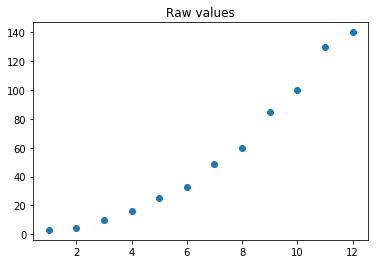

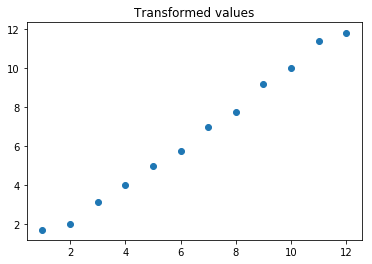

In [4]:
# Sample data.
outcome = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
feature = [3, 4, 10, 16, 25, 33, 49, 60, 85, 100, 130, 140]

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
sqrt_feature = [math.sqrt(x) for x in feature]

# Well now isn't that nice.
plt.scatter(outcome, sqrt_feature)
plt.title('Transformed values')
plt.show()

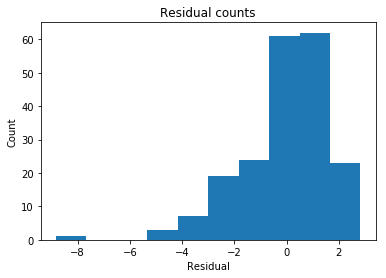

In [5]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

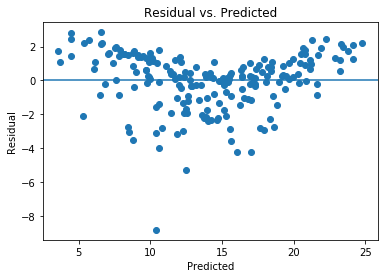

In [6]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

# Hm... looks a bit concerning.

In [7]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


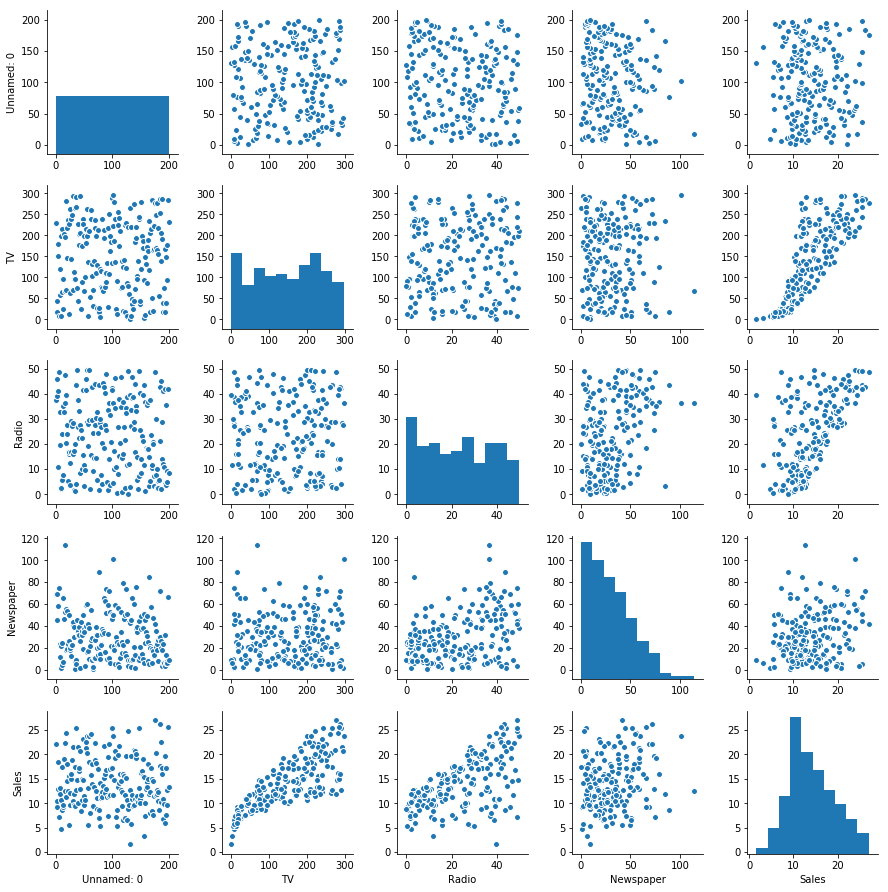

In [8]:
sns.pairplot(data)

In [9]:
# there is a relationship between TV and sales. more variance as TV ads increase.
# The other features are not normally distributed.

## Sales

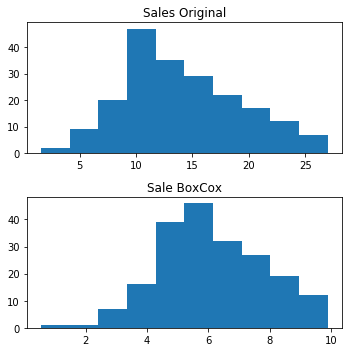

In [16]:
# try a box-cox transformation?
import scipy.stats

data['sales_boxcox'] = scipy.stats.boxcox(data['Sales'])[0]
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)
plt.hist(data['Sales'])
plt.title('Sales Original')

plt.subplot(2,1,2)
plt.hist(data['sales_boxcox'])
plt.title('Sale BoxCox')

plt.tight_layout()


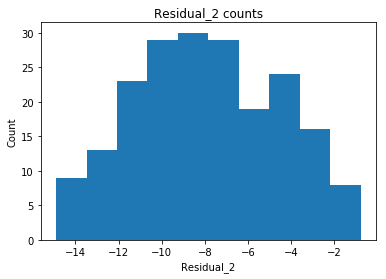

In [17]:
# look at residuals again.
predicted_2 = regr.predict(X).ravel()
actual_2 = data['sales_boxcox']

# Calculate the error, also called the residual.
residual_2 = actual_2 - predicted_2

# Plot the data.
plt.hist(residual_2)
plt.title('Residual_2 counts')
plt.xlabel('Residual_2')
plt.ylabel('Count')
plt.show()

In [18]:
# Much better looking!

## TV

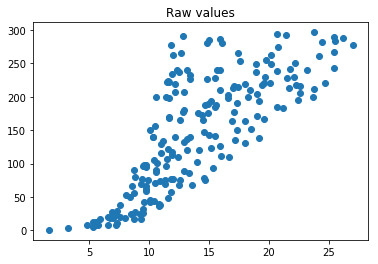

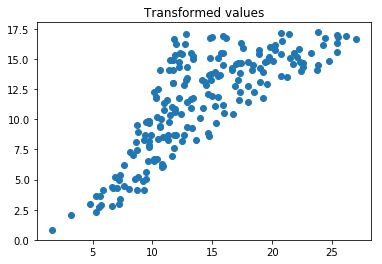

In [19]:
# TV and sales look like they have a quadratic relationship. let's try a square root transformation.
plt.scatter(data['Sales'], data['TV'])
plt.title('Raw values')
plt.show()

# Create a feature using a non-linear transformation.
data['tv_sqrt'] = np.sqrt(data['TV'])

plt.scatter(data['Sales'], data['tv_sqrt'])
plt.title('Transformed values')
plt.show()

In [20]:
# also looking better.

## Newspaper

Newspaper has a very low coefficient (close to 0). Before removing it entirely, let's take the log of it and see what happens.

In [21]:
data['log_newspaper'] = np.log(data['Newspaper'])

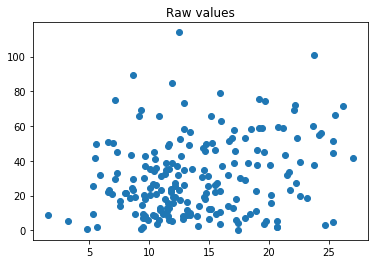

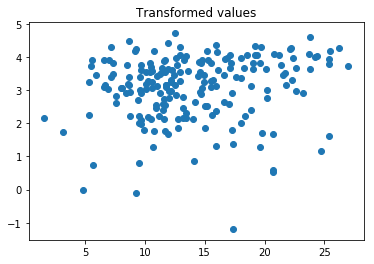

In [22]:
# Create initial plot.
plt.scatter(data['Sales'], data['Newspaper'])
plt.title('Raw values')
plt.show()

plt.scatter(data['Sales'], data['log_newspaper'])
plt.title('Transformed values')
plt.show()

In [23]:
# this didn't really do much.

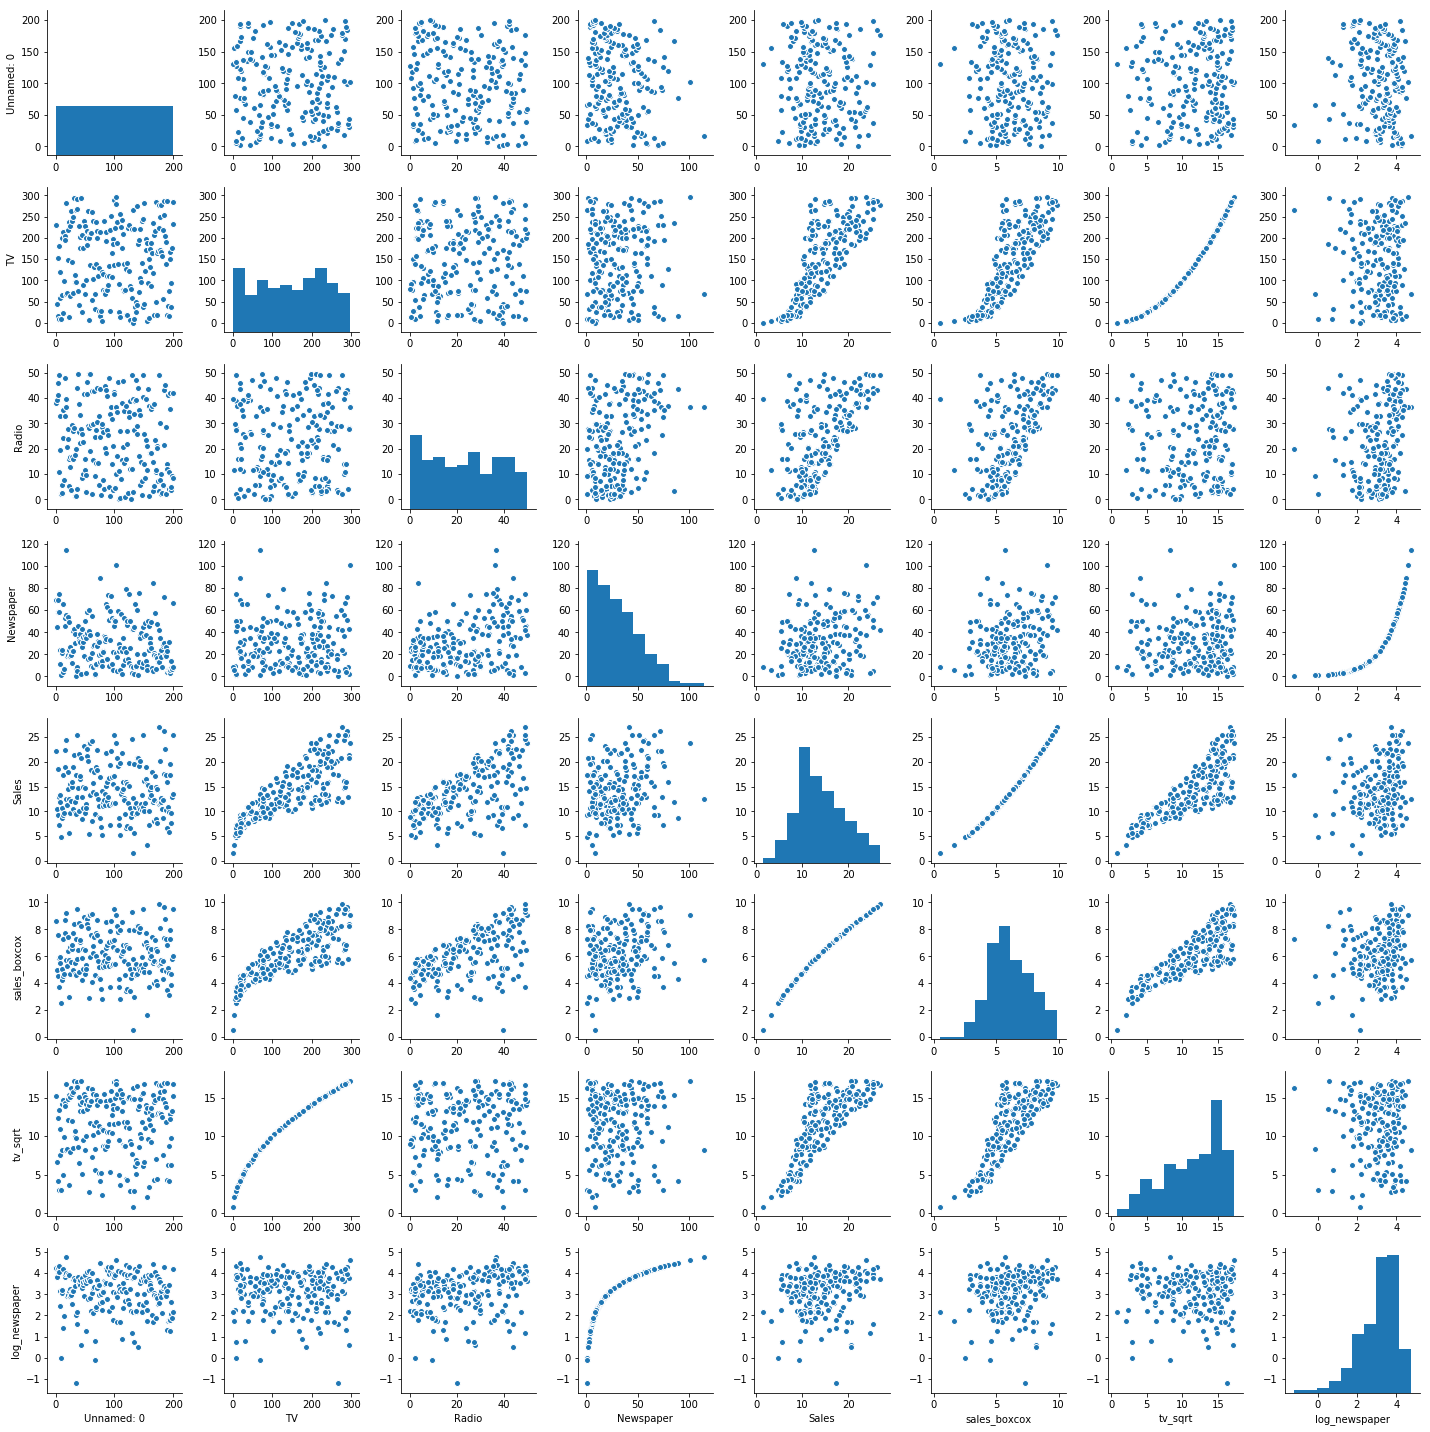

In [24]:
sns.pairplot(data)

In [27]:
# Instatiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_boxcox'].values.reshape(-1,1)
X = data[['tv_sqrt', 'Radio', 'log_newspaper']]
regr.fit(X,Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.33540325  0.06056825  0.00980048]]

Intercept: 
 [ 0.82656033]

R-squared:
0.937358215233


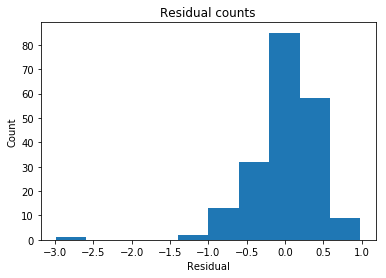

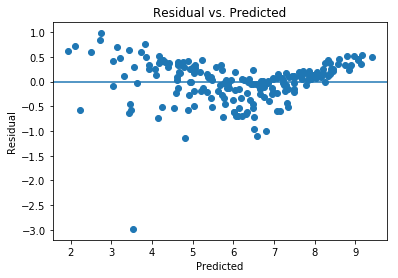

In [29]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_boxcox']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot the data.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [30]:
# remove newspaper as the coefficient is still very low.

In [31]:
# Instatiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_boxcox'].values.reshape(-1,1)
X = data[['tv_sqrt', 'Radio']]
regr.fit(X,Y)


# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coefficients: 
 [[ 0.33546101  0.06072006]]

Intercept: 
 [ 0.85251488]

R-squared:
0.937329643273


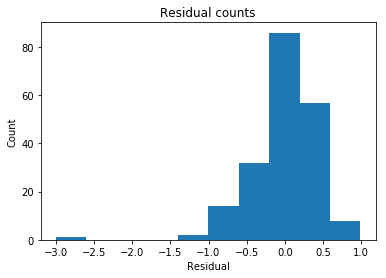

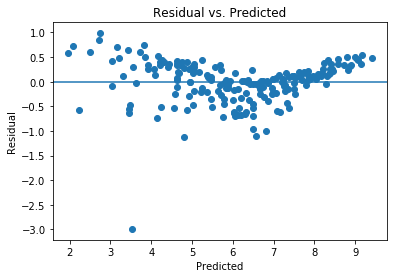

In [32]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_boxcox']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot the data.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [33]:
# similar to the first one. Let's try square rooting sales instead of boxcox.

In [35]:
data['sales_sqrt'] = np.sqrt(data['Sales'])

In [37]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['sales_sqrt'].values.reshape(-1, 1)
X = data[['tv_sqrt','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.1381653   0.02443798  0.00014568]]

Intercept: 
 [ 1.52872085]

R-squared:
0.935852367543


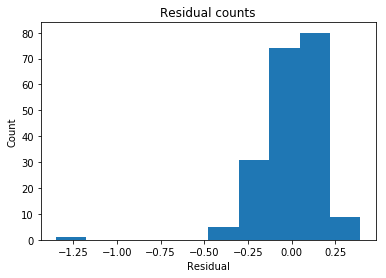

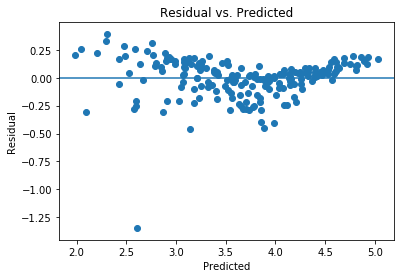

In [38]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['sales_sqrt']

# Calculate the error, also called the residual.
residual = actual - predicted

# Plot the data.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
# remove outliers?